EDA

TSV ke DataFrame

In [34]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import Counter

In [28]:
tsv_file_path = "train_preprocess.tsv.txt"

data_text = []
label = []

with open(tsv_file_path, encoding='utf-8') as tsvfile:
    tsv_reader = csv.reader(tsvfile, delimiter='\t')
    for row in tsv_reader:
        data_text.append(row[0])
        label.append(row[1])

df = pd.DataFrame({'data_text': data_text, 'label': label})

Check Data 
Data dibawah menunjukan bahwa dataset terdiri dari 11000 rows dan 2 columns

In [29]:
df

,data_text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


Check Missing Value dan Duplicate
Setelah di check terdapat duplicate data sebanyakan 67 dan tidak ada missing value.

In [32]:
missing_values = df.isnull().sum().sum()
duplicates = df.duplicated().sum()
print("Missing Values:")
print(missing_values)
print("\nDuplicate Data:")
print(duplicates)


Missing Values:
0

Duplicate Rows:
67


Drop Duplicate

In [33]:
df = df.drop_duplicates()
duplicates_after_drop = df.duplicated().sum()
print("Jumlah duplicates setelah dropping:", duplicates_after_drop)

Jumlah duplicates setelah dropping: 0


**Visualisasi**

Jumlah Data Sentiment pada Column Label 
Terdiri dari :
- Positive 58.4 % / 6383 Tweets
- Negative 31.2 % / 3412 Tweets
- Neutral 10.4 % / 1138 Tweets

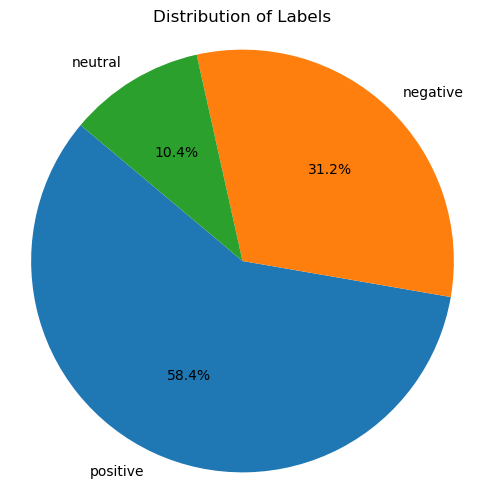

Jumlah label:
positive    6383
negative    3412
neutral     1138
Name: label, dtype: int64


In [38]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

print("Jumlah label:")
print(label_counts)

Jumlah Kata dalam Suatu Kalimat
Data Grafik Batang dibawah menunjukan rata-rata jumlah kata dalam suatu kalimat pada data kolom data_text.
Dengan rata-rata yaitu 33 kata dan nilai tengahnya berada di 28 kata.

C:\Users\Cupiz\AppData\Local\Temp\ipykernel_20644\3435712689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['data_text'].apply(lambda x: len(str(x).split()))


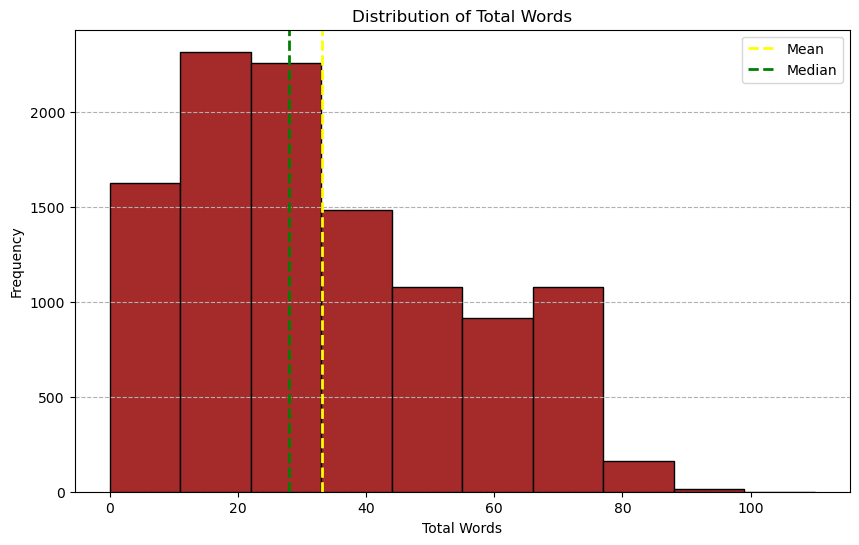

Median Word Count: 28.0
Mean Word Count: 33.060550626543495


In [67]:
df['word_count'] = df['data_text'].apply(lambda x: len(str(x).split()))

word_distribution = df['word_count'].value_counts().sort_index()
median_word_count = df['word_count'].median()
mean_word_count = df['word_count'].mean()

plt.figure(figsize=(10, 6))
bins = range(0, df['word_count'].max() + 1, int(df['word_count'].max() / 10))
plt.hist(df['word_count'], bins=bins, edgecolor='black', color='brown')
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.title('Distribution of Total Words')
plt.grid(axis='y', linestyle='--')

plt.axvline(mean_word_count, color='yellow', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_word_count, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()

plt.show()

# Print the median and mean word count
print("Median Word Count:", median_word_count)
print("Mean Word Count:", mean_word_count)

Jumlah 20 Kata Terbanyak
Dalam grafik batang dibawah menunjukan nilai 20 kata terbanyak.

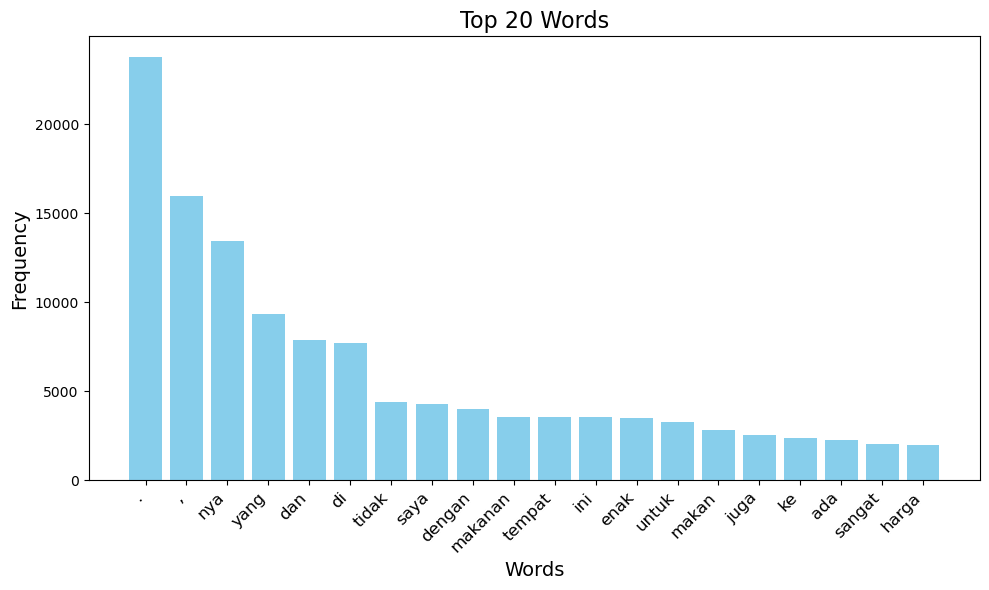

        Word  Frequency
16         .      23759
18         ,      15959
42       nya      13458
7       yang       9317
53       dan       7879
14        di       7707
43     tidak       4373
161     saya       4301
45    dengan       4008
119  makanan       3563
69    tempat       3540
1        ini       3533
76      enak       3523
132    untuk       3291
292    makan       2824
84      juga       2557
205       ke       2377
154      ada       2292
77    sangat       2042
36     harga       1976


In [72]:
all_words = ' '.join(df['data_text']).split()

word_freq = Counter(all_words)

word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=16)
plt.tight_layout()
plt.show()

print(word_freq_df.head(20))
